#Data Cleaning and RFM Metrics Calculation

A leading e-commerce company has hired you to gather recency, frequency, and monetary (RFM) indicators for its customers.
RFM breakdown:
- R (Recency): Time since the customer's last purchase (in days)
- F (Frequency): Number of purchases made by the customer
- M (Monetary): Average ticket amount spent by the customer, where the average is calculated based on the total spent per order for each customer.

For this task, you received a dataset (csv file) and must build a Python code that generates an output csv file containing only customer identification and RFM metrics.


In [3]:
# Installing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## STEP 01) Reading the file and inspecting the data

### 1. Reading the dataset

In [4]:
# Reading the database

df = pd.read_csv('/content/data.csv',encoding= 'unicode_escape')

# Displaying the database
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2. Using describe to check data distribution

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,87742.000000,87742.000000,55910.000000
mean,8.538761,5.434216,15351.550367
std,358.726762,126.219074,1770.622167
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13871.000000
50%,3.000000,2.510000,15311.000000
75%,8.000000,4.250000,17001.000000
max,74215.000000,16888.020000,18283.000000


### 3. Analyzing the data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87742 entries, 0 to 87741
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    87742 non-null  object 
 1   StockCode    87742 non-null  object 
 2   Description  87462 non-null  object 
 3   Quantity     87742 non-null  int64  
 4   InvoiceDate  87742 non-null  object 
 5   UnitPrice    87742 non-null  float64
 6   CustomerID   55910 non-null  float64
 7   Country      87742 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.4+ MB


## STEP 02) Missing values in customer identification

### 1. Checking null values with isna and using the sum function to sum the quantity of nulls


In [7]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      280
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     31832
Country            0
dtype: int64

We have a large amount of NA. Let's remove them.

### 2. Using the dropna function to remove nulls

In [8]:
df.dropna(inplace = True)

df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## STEP 03) Unit prices and quantity of products equal to or less than 0


### 1. Filtering to check for null or less than zero values in the price column


In [9]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom


We can see that there are null and less than zero values. Let's remove them.


### 2. Filtering the dataset to only contain prices above zero


In [10]:
df = df[df['UnitPrice'] > 0]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 3. Filtering to check for null or less than zero values in the quantity column


In [11]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
87603,C543662,22423,REGENCY CAKESTAND 3 TIER,-5,2/11/2011 10:49,10.95,14441.0,United Kingdom
87604,C543663,22846,BREAD BIN DINER STYLE RED,-1,2/11/2011 10:50,16.95,18118.0,United Kingdom
87634,C543671,22602,RETROSPOT WOODEN HEART DECORATION,-36,2/11/2011 11:24,0.85,18087.0,United Kingdom
87635,C543671,22600,CHRISTMAS RETROSPOT STAR WOOD,-12,2/11/2011 11:24,0.85,18087.0,United Kingdom


We can see that there are null and less than zero values. Let's remove them.


### 4. Filtering the dataset to only contain quantities above zero


In [12]:
df = df[df['Quantity'] > 0]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## STEP 04) Check for duplicate rows


### 1. Checking for duplicate rows using the duplicated function

In [13]:
df.duplicated().sum()

797

The dataframe has 5192 duplicate rows, let's exclude them.

### 2. Dropping duplicate rows

In [14]:
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

## STEP 05) Column data types

Let's check the data type of the columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53541 entries, 0 to 87647
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53541 non-null  object 
 1   StockCode    53541 non-null  object 
 2   Description  53541 non-null  object 
 3   Quantity     53541 non-null  int64  
 4   InvoiceDate  53541 non-null  object 
 5   UnitPrice    53541 non-null  float64
 6   CustomerID   53541 non-null  float64
 7   Country      53541 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


### 1. Correcting the data type of CustomerID

In [16]:
df['CustomerID'] = df['CustomerID'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53541 entries, 0 to 87647
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53541 non-null  object 
 1   StockCode    53541 non-null  object 
 2   Description  53541 non-null  object 
 3   Quantity     53541 non-null  int64  
 4   InvoiceDate  53541 non-null  object 
 5   UnitPrice    53541 non-null  float64
 6   CustomerID   53541 non-null  int64  
 7   Country      53541 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.7+ MB


### 2. Correcting the data type of InvoiceDate

In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53541 entries, 0 to 87647
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    53541 non-null  object        
 1   StockCode    53541 non-null  object        
 2   Description  53541 non-null  object        
 3   Quantity     53541 non-null  int64         
 4   InvoiceDate  53541 non-null  datetime64[ns]
 5   UnitPrice    53541 non-null  float64       
 6   CustomerID   53541 non-null  int64         
 7   Country      53541 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.7+ MB


## STEP 06) Handling outliers

Let's visualize the outliers

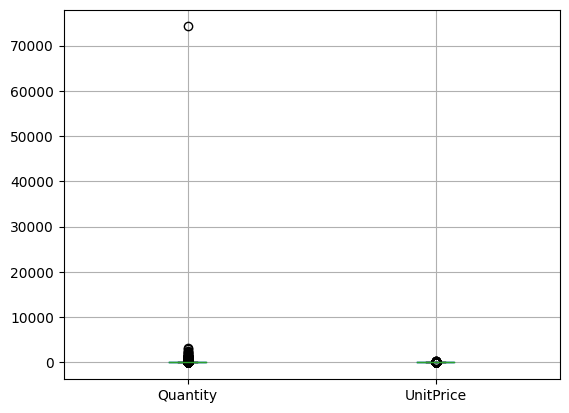

In [18]:
df.boxplot(column = ['Quantity', 'UnitPrice'])
plt.show()

Let's remove values of Quantity greater than 10,000

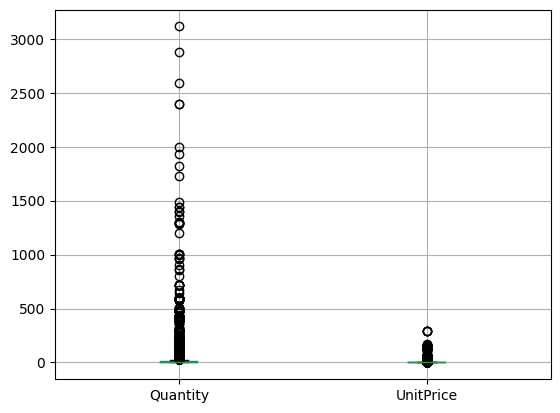

In [19]:
df.drop(df[df['Quantity'] > 10000].index, inplace=True)

df.boxplot(column = ['Quantity', 'UnitPrice'])
plt.show()

Let's exclude values of UnitPrice above 5,000

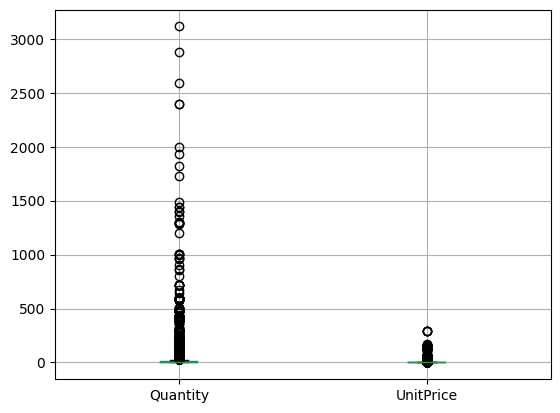

In [20]:
df.drop(df[df['UnitPrice'] > 5000].index, inplace=True)

df.boxplot(column = ['Quantity', 'UnitPrice'])
plt.show()

## STEP 07) Create an additional column

Let's create a new column that will display the total purchase price


In [21]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## STEP 08) Last date


Let's store the date of the last purchase

In [22]:
ultima_compra = df['InvoiceDate'].max()

ultima_compra

Timestamp('2011-02-11 11:40:00')

## STEP 09) Plotting graphs

Now, let's plot some information

- Top 10 countries with the highest sales value

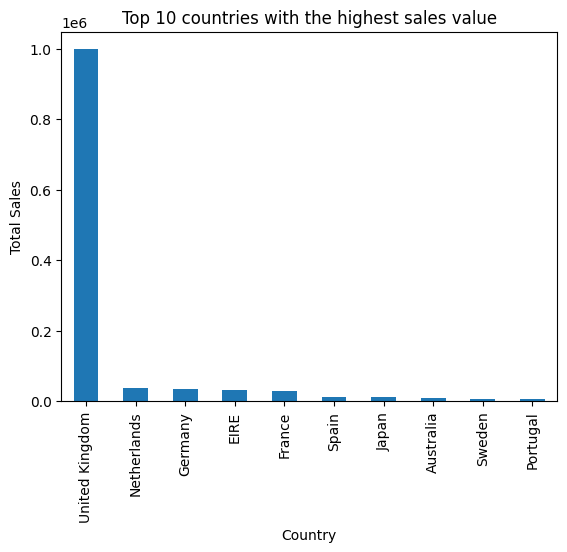

In [23]:
top_countries = df.groupby('Country')['TotalSales'].sum().nlargest(10)
top_countries.plot(kind='bar', title='Top 10 countries with the highest sales value')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

- Top 10 best-selling products:

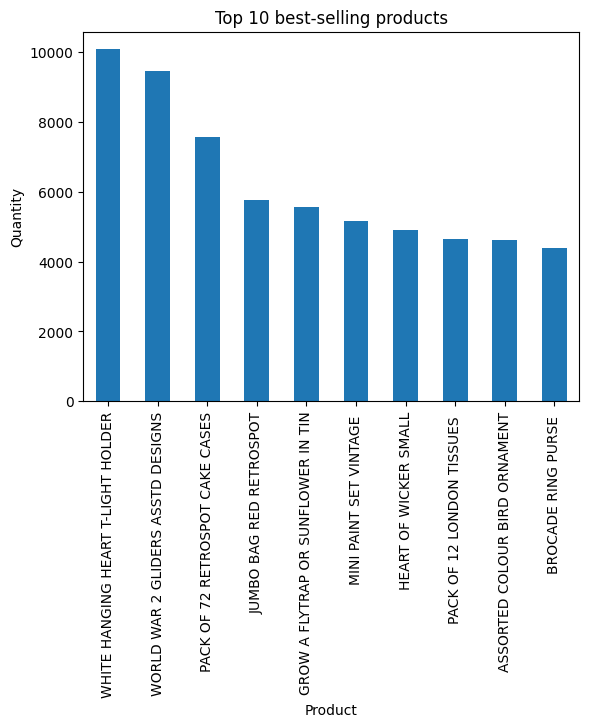

In [24]:
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top 10 best-selling products')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

- Total sales value per month:

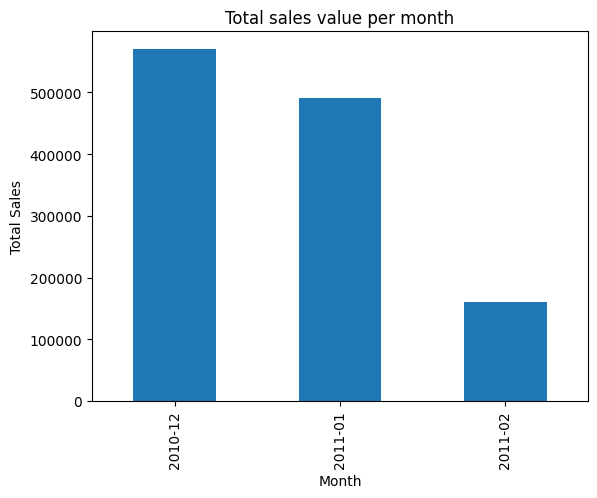

In [25]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
total_sales_per_month = df.groupby('Month')['TotalSales'].sum()
total_sales_per_month.plot(kind='bar', title='Total sales value per month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

- Total sales value per month and per country (considering only the top 10):


<Figure size 2000x3000 with 0 Axes>

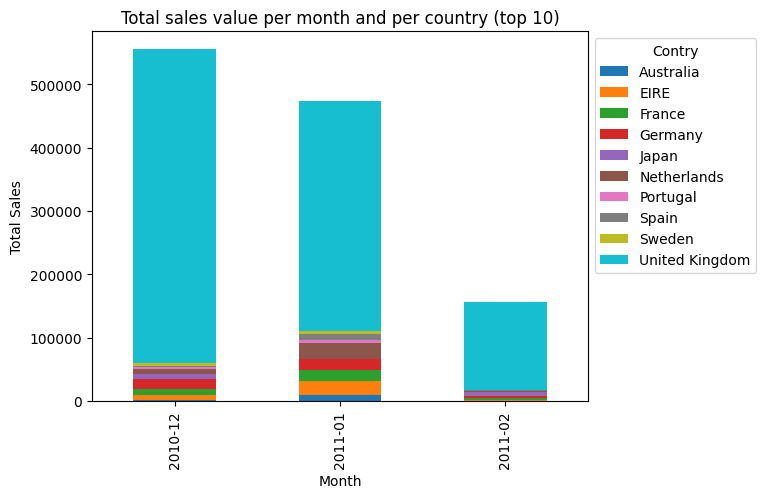

In [26]:
top_countries = df.groupby('Country')['TotalSales'].sum().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(20, 30))

total_sales_per_month_country = df_top_countries.groupby(['Month', 'Country'])['TotalSales'].sum().unstack()
total_sales_per_month_country.plot(kind='bar', stacked=True, title='Total sales value per month and per country (top 10)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Contry', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## STEP 10) RFM Calculation

Now, let's group the data by customer and order/purchase to obtain the date and total price of the order

In [27]:
Customer_df = df.groupby(['InvoiceNo', 'CustomerID']).agg({'InvoiceDate': 'max', 'TotalSales': 'sum', 'Quantity': 'count'})

Customer_df.head()

,,InvoiceDate,TotalSales,Quantity
InvoiceNo,CustomerID,,,
536365,17850,2010-12-01 08:26:00,139.12,7
536366,17850,2010-12-01 08:28:00,22.20,2
536367,13047,2010-12-01 08:34:00,278.73,12
536368,13047,2010-12-01 08:34:00,70.05,4
536369,13047,2010-12-01 08:35:00,17.85,1


Now let's calculate the RFM

- R is recency, the difference in days from the customer's last purchase to the last available purchase in the dataset, which they calculated previously.
- F is frequency, i.e., the number of purchases made by the customer;
- M is the average ticket amount, i.e., the average of purchases made by the customer.


In [28]:
# Difference in days from the last purchase of the dataset with the customer's last purchase
Customer_df['R'] = (ultima_compra - Customer_df['InvoiceDate']).dt.days

# Changing the count from quantity to F
Customer_df = Customer_df.rename(columns={'Quantity': 'F'})

# Creating a grouped table of CustomerID with the mean of TotalSales
M_client = Customer_df.groupby('CustomerID')['TotalSales'].mean().reset_index()

# Getting only the CustomerID and M columns
M_client.columns = ['CustomerID', 'M']

# Merging the two tables
Customer_df = pd.merge(Customer_df, M_client, on='CustomerID')

# Getting only the data we need: CustomerID, R, F, and M
RFM = Customer_df[['CustomerID', 'R', 'F', 'M']].copy()

# Displaying the table
RFM

,CustomerID,R,F,M
0,17850,72,7,158.565
1,17850,72,2,158.565
2,17850,72,2,158.565
3,17850,72,16,158.565
4,17850,72,16,158.565
...,...,...,...,...
2754,14555,0,14,186.340
2755,15114,0,17,259.050
2756,15133,0,10,333.200
2757,17705,0,10,136.300


CustomerID is not fully grouped due to the previous grouping with InvoiceNO, now we will group all IDs of the Customer

In [29]:
RFG_group = RFM.groupby('CustomerID').agg({'R': 'mean', 'F': 'sum', 'M': 'mean'})

RFG_group

,R,F,M
CustomerID,,,
12347,40.0,60,593.590
12348,36.5,23,560.120
12350,8.0,17,334.400
12356,24.0,36,2271.620
12359,16.0,96,1193.205
...,...,...,...
18250,8.0,21,349.270
18259,64.0,7,376.300
18260,44.0,37,393.885


Finally, we have our RFM table

